# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc as AUC_score
from tqdm import tqdm

In [2]:

data = pd.read_csv('preprocessed_data.csv')
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [3]:
X  =  data.drop('project_is_approved',axis=1)
y  =  data['project_is_approved']

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [6]:
# Encode Essay -  Set using BOW
print('Before encode shape of X_train : '+str(X_train.shape))
print('Before encode shape of X_CV : '+str(X_test.shape))
print('-'*110)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("-"*100)

Before encode shape of X_train : (73196, 8)
Before encode shape of X_CV : (36052, 8)
--------------------------------------------------------------------------------------------------------------
After vectorizations
(73196, 50000) (73196,)
(36052, 50000) (36052,)
----------------------------------------------------------------------------------------------------


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [7]:
# Categorial Feature Encoding


print('1. State Encoding')
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('2. Teachers prefix Encoding')

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('3. Project_grade_category')

vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('4. Clean_category')

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
#print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('5. Clean_subcategory')

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_clean_subcat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
#print(X_cv_clean_subcat_ohe.shape, y_cv.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


1. State Encoding
After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
2. Teachers prefix Encoding
After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
3. Project_grade_category
After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
4. Clean_category
After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
5. Clean_subcategory
After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hu

In [8]:
# Numerical
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

print('1. Price')
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

print('1. Teacher_number_of_previously_posted_projects')
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_prsub_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_previous_prsub_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_prsub_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_previous_prsub_norm.shape, y_train.shape)
#print(X_cv_previous_prsub_norm.shape, y_cv.shape)
print(X_test_previous_prsub_norm.shape, y_test.shape)
print("="*100)




1. Price
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
1. Teacher_number_of_previously_posted_projects
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [9]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_price_norm,X_train_previous_prsub_norm)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_price_norm,X_cv_previous_prsub_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_price_norm,X_test_previous_prsub_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

#print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
#print(X_test_essay_bow.shape, y_test.shape)

Final Data matrix
(73196, 50101) (73196,)
(36052, 50101) (36052,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
clf = MultinomialNB()
clf.fit(X_tr, y_train)
predict_te  = clf.predict(X_te)
print('--'*60)
print('Confusion matrix for Set1')
print(confusion_matrix(y_test,predict_te))
print('--'*60)
print('Accuracy Score for set1')
Acc_test  = confusion_matrix(y_test,predict_te)
True_Negative = Acc_test[0][0]
True_positive = Acc_test[1][1]
False_positive = Acc_test[0][1]
False_negative = Acc_test[1][0]

Accuracy  = (True_Negative + True_positive) / (True_Negative+True_positive+False_positive+False_negative)

print(Accuracy)

------------------------------------------------------------------------------------------------------------------------
Confusion matrix for Set1
[[ 2906  2553]
 [ 7464 23129]]
------------------------------------------------------------------------------------------------------------------------
Accuracy Score for set1
0.7221513369577277


<font color='green'><b>Set2 </b><strong>Categorical, numerical features + preprocessed_eassay (TFIDF)</strong>   

In [11]:
data = pd.read_csv('preprocessed_data.csv')
#print(data.head(2))

#Initializse Independent and dependent variable
X  =  data.drop('project_is_approved',axis=1)
y  =  data['project_is_approved']

#Train and Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_set2, y_test_set2 = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train_set2, y_cv_set2 = train_test_split(X_train, y_train_set2, test_size=0.33, stratify=y_train_set2)

In [12]:
Feature_names = []

In [14]:
# Encode Essay -  Set using BOW
print('Before encode shape of X_train : '+str(X_train.shape))
#print('Before encode shape of X_CV : '+str(X_cv.shape))
print('-'*110)

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data



# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)

#X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("-"*100)

Before encode shape of X_train : (73196, 8)
--------------------------------------------------------------------------------------------------------------
After vectorizations
(73196, 50000) (73196,)
(36052, 50000) (36052,)
----------------------------------------------------------------------------------------------------


In [15]:
#len(Feature_names)
Feature_names.extend(vectorizer.get_feature_names())
len(Feature_names)

50000

In [16]:
# Categorial Feature Encoding


print('1. State Encoding')
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
#Add Feature name 
Feature_names.extend(vectorizer.get_feature_names())
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('2. Teachers prefix Encoding')

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
#Add Feature name 
Feature_names.extend(vectorizer.get_feature_names())
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('3. Project_grade_category')

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#Add Feature name 
Feature_names.extend(vectorizer.get_feature_names())
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('4. Clean_category')

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
#Add Feature name 
Feature_names.extend(vectorizer.get_feature_names())
#X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
#print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

print('5. Clean_subcategory')

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_categories'].values)
#Add Feature name 
Feature_names.extend(vectorizer.get_feature_names())
#X_cv_clean_subcat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
#print(X_cv_clean_subcat_ohe.shape, y_cv.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


1. State Encoding
After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
2. Teachers prefix Encoding
After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
3. Project_grade_category
After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
4. Clean_category
After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
5. Clean_subcategory
After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hu

In [17]:
# Numerical
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

print('1. Price')
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

print('1. Teacher_number_of_previously_posted_projects')
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_prsub_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_previous_prsub_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_prsub_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_previous_prsub_norm.shape, y_train.shape)
#print(X_cv_previous_prsub_norm.shape, y_cv.shape)
print(X_test_previous_prsub_norm.shape, y_test.shape)
print("="*100)



1. Price
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
1. Teacher_number_of_previously_posted_projects
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [18]:
Feature_names.extend(['Price','Teacher_number_of_previously_posted_projects'])

In [19]:
len(Feature_names)

50101

In [20]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set2 = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_price_norm,X_train_previous_prsub_norm)).tocsr()
#X_cr_set2 = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_price_norm,X_cv_previous_prsub_norm)).tocsr()
X_te_set2 = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_price_norm,X_test_previous_prsub_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set2.shape, y_train_set2.shape)
#print(X_cr_set2.shape, y_cv_set2.shape)
print(X_te_set2.shape, y_test_set2.shape)
print("="*100)

Final Data matrix
(73196, 50101) (73196,)
(36052, 50101) (36052,)


In [21]:
clf = MultinomialNB()
clf.fit(X_tr_set2, y_train)
predict_te  = clf.predict(X_te_set2)
print('--'*60)
print('Confusion matrix for Set2')
print(confusion_matrix(y_test_set2,predict_te))
print('--'*60)
print('Accuracy Score for set2')
Acc_test  = confusion_matrix(y_test_set2,predict_te)
True_Negative = Acc_test[0][0]
True_positive = Acc_test[1][1]
False_positive = Acc_test[0][1]
False_negative = Acc_test[1][0]

Accuracy  = (True_Negative + True_positive) / (True_Negative+True_positive+False_positive+False_negative)

print(Accuracy)

------------------------------------------------------------------------------------------------------------------------
Confusion matrix for Set2
[[   11  5448]
 [   11 30582]]
------------------------------------------------------------------------------------------------------------------------
Accuracy Score for set2
0.8485798291356929


In [22]:
print('DOne')

DOne


## 2. The hyper paramter tuning(find best alpha:smoothing parameter)

#### Set1 - BOW

#### 2.1 Find the best hyper parameter which will give the maximum AUC value - Set1

In [25]:
# Find best AUC value Set 1

alphas = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
best_alpha_selection = {}
for i in alphas: 
    #print(i)
    clf_model = MultinomialNB(alpha=i)
    #print(clf_model)
    clf_model.fit(X_tr, y_train)
    predict_cv_prob = clf_model.predict_proba(X_te)[:,1]
    predict_cv_prob = np.array(predict_cv_prob)
    fpr,tpr,thershold = roc_curve(y_test,predict_cv_prob)   
    #print(fpr,tpr)
    best_alpha_selection[i] = AUC_score(fpr,tpr)


best_alpha_selection
sorted_auc = sorted(best_alpha_selection.items(), key=lambda x: (x[1], x[0]),reverse=True)
print('Best Auc_value when we have alpha value as {} with accuracy {} ' . format(sorted_auc[0][0],sorted_auc[0][1]))

Best Auc_value when we have alpha value as 0.1 with accuracy 0.700864307713895 


In [26]:
from sklearn.model_selection import RandomizedSearchCV
# prepare a range of alpha values to test
#alphas = np.array([1000,100,10,1,0.1,0.01,0.001,0.0001])

alphas = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])


clf_model = MultinomialNB()
parameters = {'alpha':alphas}
clf = RandomizedSearchCV(clf_model, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)


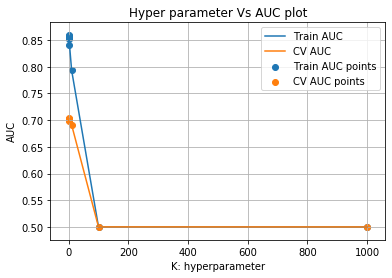

In [27]:

results = results.sort_values(['rank_test_score'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()



In [28]:
print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

#from the graph itself we can say alpha =1 is best value , distance between Train and Cross validation is low compare to other alpha values..

Best cross-validation score: 0.70
Best parameters:  {'alpha': 0.1}


#### Set 2 - TF-IDF

#### 2.1 Find the best hyper parameter which will give the maximum AUC value - Set2

In [29]:
# Find best AUC value Set 2

alphas = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
best_alpha_selection = {}
for i in alphas: 
    #print(i)
    clf_model = MultinomialNB(alpha=i)
    #print(clf_model)
    clf_model.fit(X_tr_set2, y_train_set2)
    predict_cv_prob = clf_model.predict_proba(X_te_set2)[:,1]
    predict_cv_prob = np.array(predict_cv_prob)
    fpr,tpr,thershold = roc_curve(y_test_set2,predict_cv_prob)   
    #print(fpr,tpr)
    best_alpha_selection[i] = AUC_score(fpr,tpr)


best_alpha_selection
sorted_auc = sorted(best_alpha_selection.items(), key=lambda x: (x[1], x[0]),reverse=True)
print('Best Auc_value when we have alpha value as {} with accuracy {} for set2 ' . format(sorted_auc[0][0],sorted_auc[0][1]))

Best Auc_value when we have alpha value as 0.001 with accuracy 0.6961027282017509 for set2 


### 2.2Random_Search_CV

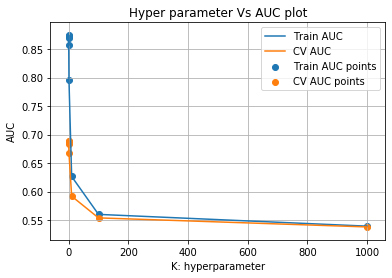

Best cross-validation score: 0.69
Best parameters:  {'alpha': 0.1}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# prepare a range of alpha values to test
#alphas = np.array([0,0.1,0.01,0.001,0.0001,1])
alphas = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])


clf_model = MultinomialNB()
parameters = {'alpha':alphas}
clf = RandomizedSearchCV(clf_model, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_set2, y_train_set2)

results = pd.DataFrame.from_dict(clf.cv_results_)


results = results.sort_values(['rank_test_score'])

#print(results)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()



print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

# For ITF-IDF alpha 0.1 wil be best value, Distance between train and cross validation is low.

## 3. Representation of results

------------------------------------------------------------------------------------------------------------------------
Confusion matrix for Set1
[[ 2906  2553]
 [ 7464 23129]]
------------------------------------------------------------------------------------------------------------------------
Accuracy Score for set1
0.7221513369577277


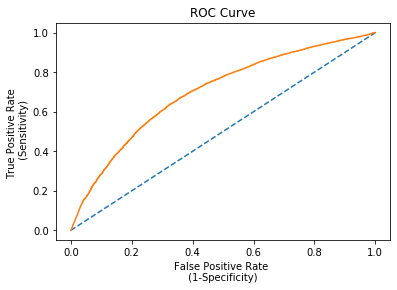

In [33]:
# set1 - Best Alpha value is 1
clf = MultinomialNB()
clf.fit(X_tr, y_train)
predict_cv  = clf.predict(X_te)
print('--'*60)
print('Confusion matrix for Set1')
print(confusion_matrix(y_test,predict_cv))
print('--'*60)
print('Accuracy Score for set1')
Acc_test  = confusion_matrix(y_test,predict_cv)
True_Negative = Acc_test[0][0]
True_positive = Acc_test[1][1]
False_positive = Acc_test[0][1]
False_negative = Acc_test[1][0]

Accuracy  = (True_Negative + True_positive) / (True_Negative+True_positive+False_positive+False_negative)

print(Accuracy)

#Roc Curve
y_pred_prob = clf.predict_proba(X_te)[:,1] 

fpr,tpr,thershold = roc_curve(y_test,y_pred_prob)
#fpr - False Postive rate
#tpr - True Postive rate

#Plot ROC curve
plt.plot([0,1],[0,1],'--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate \n (1-Specificity) ')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('ROC Curve')
plt.show()

------------------------------------------------------------------------------------------------------------------------
Confusion matrix for Set2
[[   10  5449]
 [    5 30588]]
------------------------------------------------------------------------------------------------------------------------
Accuracy Score for set2
0.8487185176966604


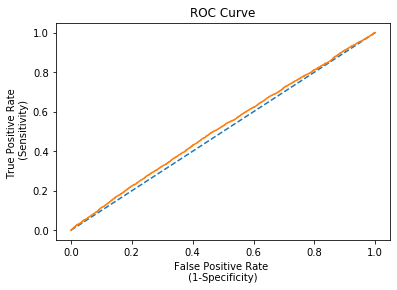

In [34]:
# set2 - Best Alpha value is 0.1

clf = MultinomialNB(alpha=0.1)
clf.fit(X_tr_set2, y_train)
predict_cv  = clf.predict(X_te_set2)
print('--'*60)
print('Confusion matrix for Set2')
print(confusion_matrix(y_test_set2,predict_cv))
print('--'*60)
print('Accuracy Score for set2')
Acc_test  = confusion_matrix(y_test_set2,predict_cv)
True_Negative = Acc_test[0][0]
True_positive = Acc_test[1][1]
False_positive = Acc_test[0][1]
False_negative = Acc_test[1][0]

Accuracy  = (True_Negative + True_positive) / (True_Negative+True_positive+False_positive+False_negative)

print(Accuracy)

#Roc Curve
y_pred_prob = clf.predict_proba(X_te_set2)[:,1] 

fpr,tpr,thershold = roc_curve(y_test_set2,y_pred_prob)
#fpr - False Postive rate
#tpr - True Postive rate

#Plot ROC curve
plt.plot([0,1],[0,1],'--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate \n (1-Specificity) ')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('ROC Curve')
plt.show()


### 4.fine the top 20 features from either from feature Set 1 or feature Set 2 using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names

In [35]:
pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()

print('Top 20 best feature in set2 - TF-IDF are: ')
print(list((np.take(Feature_names, pos_class_prob_sorted[:20]))))

Top 20 best feature in set2 - TF-IDF are: 
['performingarts', 'mathematics', 'nutritioneducation', 'literature_writing', 'literacy', 'history_geography', 'health_wellness', 'other', 'parentinvolvement', 'health_lifescience', 'gym_fitness', 'foreignlanguages', 'financialliteracy', 'socialsciences', 'extracurricular', 'esl', 'music', 'economics', 'visualarts', 'teamsports']


## 5. summarize the results at the end of the notebook, summarize it in the table format

In [38]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper_Parameter",'AUC']
x.add_row(['Bow','NaiveBayes','0.1','0.70'])
x.add_row(['TF-IDF','NaiveBayes','0.1','0.69'])

In [39]:
print(x)

+------------+------------+-----------------+------+
| Vectorizer |   Model    | Hyper_Parameter | AUC  |
+------------+------------+-----------------+------+
|    Bow     | NaiveBayes |       0.1       | 0.70 |
|   TF-IDF   | NaiveBayes |       0.1       | 0.69 |
+------------+------------+-----------------+------+
